In [4]:
#obliczenie pola powierzchni przekroju i objętości pręta

import numpy as np 

D = 0.0095
L = 1.45
A = np.pi * np.power(D,2) * 0.25
V = A * L

print("V = ", V, " [m^3]")
print("A = ", A, " [m^2]")

#obliczenie generacji ciepła z Prawa Joule'a
#obliczenie objętościowego źródła ciepła

I = 141
ro = 5.34e-8
R = ro * L / A
Q = np.power(I,2) * R
qv = Q / V

print("R = ", R, " [Ohm]")
print("Q = ", Q, " [W]")
print("qv = ", qv, " [W/m^3]")

V =  0.00010277916715759857  [m^3]
A =  7.08821842466197e-05  [m^2]
R =  0.0010923760437545004  [Ohm]
Q =  21.717528125883224  [W]
qv =  211302.8226097824  [W/m^3]


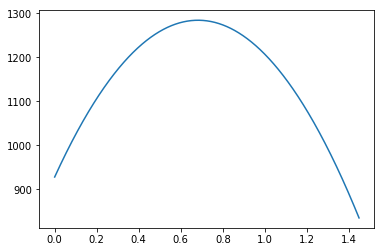

Maksymalna temperatura wynosi: [1284.45449925] [K] i znajduje się w odległości: [0.68295] [m] od początku pręta. 

Temperatura krytyczna nie została przekroczona.


In [5]:
#obliczenie rozkładu temperatury w pręcie - MRS

import numpy as np 
import matplotlib.pyplot as plt

#długość pręta zostanie podzielona na N równych części
N = 1000
T0 = 928.0
Tn = 835.0
Tk = 1330.0

#stworzenie macierzy A i wypełnienie jej odpowiednimi danymi:
#Ti = -2, Ti+1 = Ti-1 = 1, T0 = Tn = 1
A = np.zeros((N, N), dtype = int)

for i in range(1, N-1):
    A[i, i-1] = 1
    A[i,i] = -2
    A [i,i+1] = 1

A[0,0] = 1
A[N-1,N-1] = 1

#print("Macierz A:\n", A)
#print("\n")
        
#stworzenie i uzupełnienie macierzy rozwiązań B
k = 138
w = (-qv*np.power(L/N,2)/k)

B = np.zeros(N).reshape((N,1))
for i in range(1,N-1):
    B[i] = w
B[0] = T0
B[N-1] = Tn

#print("Macierz B: \n", B)
#print("\n")

#Rozwiązanie układu równań A*T=B
T = np.linalg.solve(A, B)
#print("Rozwiązanie układu równań: \n", x)

x = np.zeros(N).reshape((N,1))
for i in range(1,N):
    x[i][0] = x[i-1][0]+(L/N)

#print("\n")
#print(x)

plt.plot(x,T)
plt.show()

#maksymalna temperatura
max_val = 0
max_pos = 0
for i in range(1, N): 
        if T[i] > max_val: 
            max_val = T[i]
            max_pos = x[i]

print("Maksymalna temperatura wynosi:", max_val, "[K] i znajduje się w odległości:", max_pos, "[m] od początku pręta. \n")

if (max_val - Tk > 0):
    print("Temperatura maksymalna przekroczyła temperaturę krytyczną.")
else:
    print("Temperatura krytyczna nie została przekroczona.")

In [6]:
#obliczenie maksymalnego napięcia, przy którym nie zostanie przekroczona temp. krytyczna

import numpy as np

D = 0.0095
L = 1.45
A = np.pi * np.power(D,2) * 0.25
V = A * L
ro = 5.34e-8
R = ro * L / A

N = 1000
T0 = 928.0
Tn = 835.0
Tk = 1330.0

A = np.zeros((N, N), dtype = int)

for i in range(1, N-1):
    A[i, i-1] = 1
    A[i,i] = -2
    A [i,i+1] = 1

A[0,0] = 1
A[N-1,N-1] = 1

I = 141

while(1):
    Q = np.power(I,2) * R
    qv = Q / V

    k = 138
    w = (-qv*np.power(L/N,2)/k)

    B = np.zeros(N).reshape((N,1))
    for i in range(1,N-1):
        B[i] = w
    B[0] = T0
    B[N-1] = Tn

    T = np.linalg.solve(A, B)

    x = np.zeros(N).reshape((N,1))
    for i in range(1,N):
        x[i][0] = x[i-1][0]+(L/N)

    max_val = 0
    max_pos = 0
    for i in range(1, N): 
            if T[i] > max_val: 
                max_val = T[i]
                max_pos = x[i]
    if (max_val - Tk > 0):
        break
    I = I + 0.1

print("Maksymalne natężenie prądu, aby nie przekroczyć temperaury krytycznej to: ", round(I), "A")

Maksymalne natężenie prądu, aby nie przekroczyć temperaury krytycznej to:  149 A
